# Time and Word Counting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('../data/clean_whatsapp.csv')

In [3]:
#using regx so only character strings are analysed

def word_count(line):
    wordCount = len(re.findall(r'\w+', line))
    return wordCount

In [4]:
#create a wordcount column

df['wordcount'] = df['message'].apply(word_count)

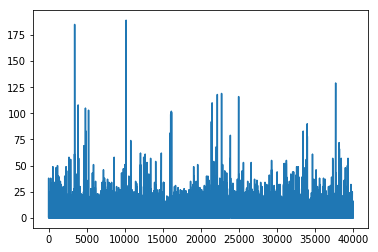

In [5]:
df['wordcount'].plot()

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y, %H:%S')

In [7]:
#making the above madness into a reproducable function
def average_day(df):
    nameList = df['name'].unique()
    timePeriod = len(df['datetime'].dt.date.unique())
    print(timePeriod)
    for names in nameList:
        output = df.loc[df['name']== names].groupby(df['datetime'].dt.hour)['message'].count()
        plt.plot(output/timePeriod)
        plt.title("Hourly Average")
        plt.legend(nameList)
        plt.xlabel("Hour")
        plt.ylabel("Messages")

131


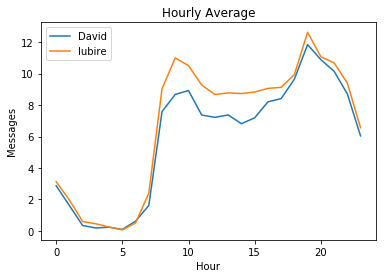

In [8]:
average_day(df)